Data source: https://www.kaggle.com/passnyc/data-science-for-good

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
suicide = pd.read_csv('E:/data/suicide-rates-overview-1985-to-2016/master.csv')
suicide.sample(1)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
19829,Puerto Rico,1997,female,35-54 years,12,503717,2.38,Puerto Rico1997,NaN,"48,187,039,000",14037,Boomers


In [3]:
suicide['year'].head()

0    1987
1    1987
2    1987
3    1987
4    1987
Name: year, dtype: int64

In [4]:
suicide.groupby(['country'])['year'].min().sort_values().tail(15)

country
Latvia                    1995
South Africa              1996
Serbia                    1998
San Marino                1999
Cyprus                    1999
Montenegro                2000
Maldives                  2000
Fiji                      2001
United Arab Emirates      2005
Turkey                    2009
Oman                      2009
Nicaragua                 2010
Cabo Verde                2011
Bosnia and Herzegovina    2011
Mongolia                  2016
Name: year, dtype: int64

In [5]:
suicide = suicide[~suicide.country.isin(['South Africa','Serbia','San Marino','Cyprus','Montenegro','Maldives','Fiji','United Arab Emirates','Turkey','Oman','Nicaragua','Cabo Verde','Bosnia and Herzegovina','Mongolia'])]

In [6]:
suicide.groupby(['country'])['year'].max().sort_values().head(15)

country
Dominica                 1985
Saint Kitts and Nevis    1992
Macau                    1994
Kiribati                 2001
Sri Lanka                2006
Azerbaijan               2007
Albania                  2010
Philippines              2011
Aruba                    2011
Jamaica                  2011
Trinidad and Tobago      2011
Bahamas                  2013
Barbados                 2013
Guyana                   2013
New Zealand              2013
Name: year, dtype: int64

In [7]:
suicide = suicide[~suicide.country.isin(['Dominica','Saint Kitts and Nevis','Macau','Kiribati','Sri Lanka','Azerbaijan','Albania','Philippines','Aruba','Jamaica','Trinidad and Tobago'])]

In [8]:
suicide = suicide.drop(['HDI for year','country-year'],axis=1)

In [9]:
suicide.head(1)

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
264,Antigua and Barbuda,1985,female,15-24 years,0,7709,0.0,"240,923,926",3850,Generation X


In [10]:
list(suicide)

['country',
 'year',
 'sex',
 'age',
 'suicides_no',
 'population',
 'suicides/100k pop',
 ' gdp_for_year ($) ',
 'gdp_per_capita ($)',
 'generation']

In [11]:
suicide.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24812 entries, 264 to 27819
Data columns (total 10 columns):
country               24812 non-null object
year                  24812 non-null int64
sex                   24812 non-null object
age                   24812 non-null object
suicides_no           24812 non-null int64
population            24812 non-null int64
suicides/100k pop     24812 non-null float64
 gdp_for_year ($)     24812 non-null object
gdp_per_capita ($)    24812 non-null int64
generation            24812 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 1.6+ MB


In [12]:
suicide['sex'] = suicide['sex'].astype('category')
suicide['age']=suicide['age'].astype('category')
suicide['generation']=suicide['generation'].astype('category')
suicide['gdp_for_year ($)']=suicide[' gdp_for_year ($) '].astype(str)
suicide=suicide.drop(' gdp_for_year ($) ',axis=1)

In [13]:
suicide.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24812 entries, 264 to 27819
Data columns (total 10 columns):
country               24812 non-null object
year                  24812 non-null int64
sex                   24812 non-null category
age                   24812 non-null category
suicides_no           24812 non-null int64
population            24812 non-null int64
suicides/100k pop     24812 non-null float64
gdp_per_capita ($)    24812 non-null int64
generation            24812 non-null category
gdp_for_year ($)      24812 non-null object
dtypes: category(3), float64(1), int64(4), object(2)
memory usage: 1.4+ MB


In [14]:
suicide['gdp_for_year ($)']=suicide['gdp_for_year ($)'].str.replace(",","")

In [15]:
suicide['gdp_for_year ($)']=suicide['gdp_for_year ($)'].astype('int64')
suicide['gdp_for_year ($)']=suicide['gdp_for_year ($)']
suicide['gdp_for_year ($)'].sample(2)

13682    6157459594824
16749     707906744575
Name: gdp_for_year ($), dtype: int64

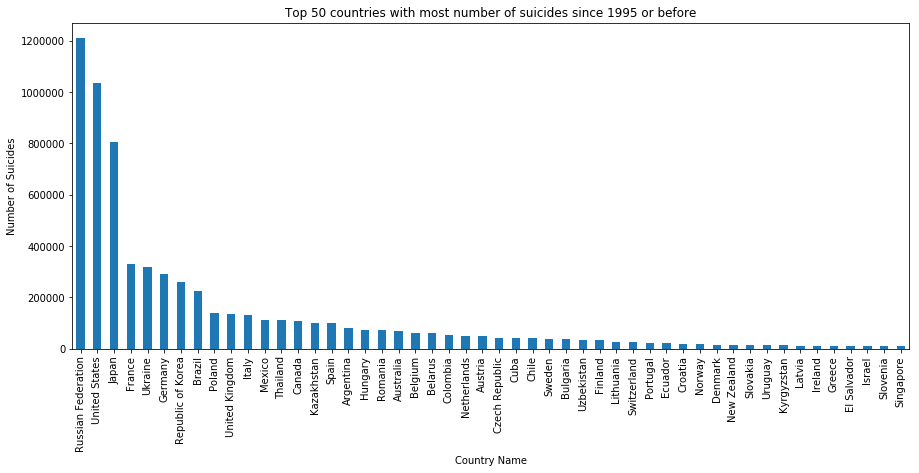

In [16]:
plt.figure(figsize=(15,6))
suicide.groupby(['country'])['suicides_no'].sum().sort_values(ascending=False).head(50).plot(kind='bar');
plt.ylabel('Number of Suicides')
plt.xlabel('Country Name')
plt.title('Top 50 countries with most number of suicides since 1995 or before');

In [17]:
suicide.groupby(['country'])['suicides_no'].sum().sort_values(ascending=False).head(10)

country
Russian Federation    1209742
United States         1034013
Japan                  806902
France                 329127
Ukraine                319950
Germany                291262
Republic of Korea      261730
Brazil                 226613
Poland                 139098
United Kingdom         136805
Name: suicides_no, dtype: int64

In [18]:
Top10 = suicide[suicide.country.isin(['Russian Federation','United States','Japan','France','Ukraine','Germany','Republic of Korea','Brazil','Poland','United Kingdom'])]

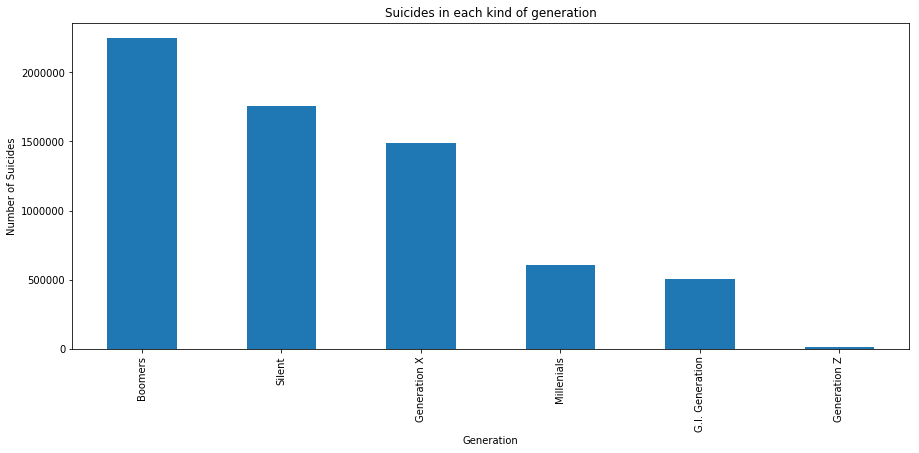

In [19]:
plt.figure(figsize=(15,6))
suicide.groupby(['generation'])['suicides_no'].sum().sort_values(ascending=False).plot(kind='bar');
plt.ylabel('Number of Suicides')
plt.xlabel('Generation')
plt.title('Suicides in each kind of generation');

In [20]:
suicide['gdp_per_capita ($)'].replace(0, np.nan, inplace=True)

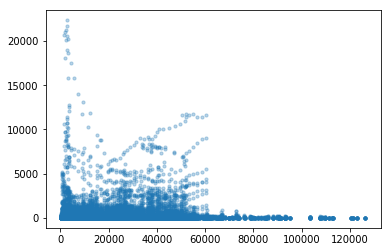

In [21]:
plt.scatter(x=suicide['gdp_per_capita ($)'],y=suicide['suicides_no'], alpha= 0.3,s=10);

In [22]:
By_Country = suicide.groupby(['country'],as_index=False).agg({'suicides_no':'sum','population':'mean','suicides/100k pop':'mean','gdp_per_capita ($)':'mean','gdp_for_year ($)':'mean'})


In [23]:
By_Country

,country,gdp_for_year ($),gdp_per_capita ($),suicides_no,suicides/100k pop,population
0,Antigua and Barbuda,8.035452e+08,10448.185185,11,0.552901,6.142679e+03
1,Argentina,2.742565e+11,7914.096774,82219,10.469328,2.784907e+06
2,Armenia,5.386592e+09,1873.919463,1905,3.275872,2.595576e+05
3,Australia,6.327501e+11,32776.400000,70111,12.992806,1.506605e+06
4,Austria,2.660162e+11,34261.780105,50073,23.759764,6.383589e+05
5,Bahamas,7.613828e+09,25836.391304,93,1.247391,2.375742e+04
6,Bahrain,1.608647e+10,18039.523810,463,1.854127,6.648383e+04
7,Barbados,3.090574e+09,12251.000000,177,2.970433,2.071230e+04
8,Belarus,3.067641e+10,3333.904762,59892,31.075913,7.832234e+05
9,Belgium,3.184024e+11,32066.741935,62761,21.237903,8.153296e+05


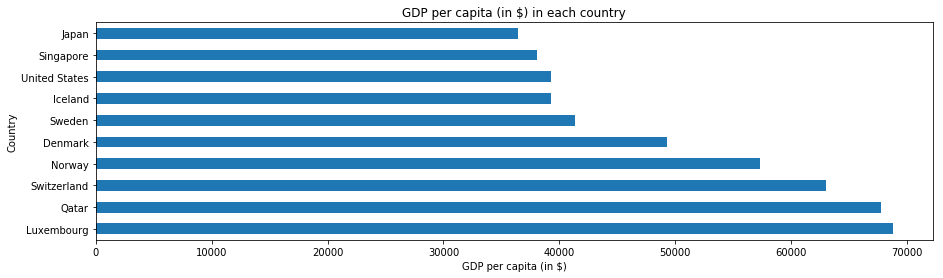

In [24]:
plt.figure(figsize=(15,4))
CIndex = By_Country.set_index('country')
CIndex['gdp_per_capita ($)'].sort_values(ascending=False).head(10).plot(kind='barh');
plt.xlabel('GDP per capita (in $)')
plt.ylabel('Country')
plt.title('GDP per capita (in $) in each country');

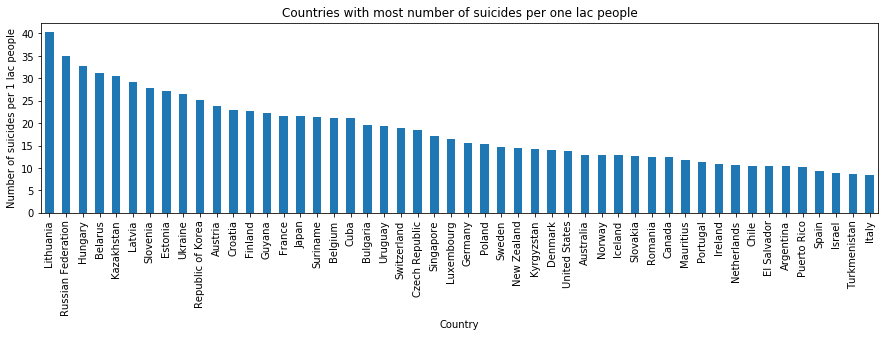

In [25]:
plt.figure(figsize=(15,3.5))
CIndex['suicides/100k pop'].sort_values(ascending=False).head(50).plot(kind='bar');
plt.ylabel('Number of suicides per 1 lac people')
plt.xlabel('Country')
plt.title('Countries with most number of suicides per one lac people');

In [64]:
def yearwise_variation_in(x):
    plt.figure(figsize=(15,3.5));
    ax1 = sns.pointplot(x='year',y='suicides/100k pop',data=suicide[suicide['country']==x], color = 'orange');
    ax2 = ax1.twinx()
    sns.pointplot(x='year',y=suicide['gdp_per_capita ($)'].rolling(window=5).mean(),data=suicide[suicide['country']==x], ax = ax2, color = 'red');
    ax1.set_ylabel('Number of Suicides per lac people(Orange)')
    ax2.set_ylabel('GDP per capita-in $ (Blue)');
    plt.title('Year wise variation in Number of Suicides and GDP per Capita');

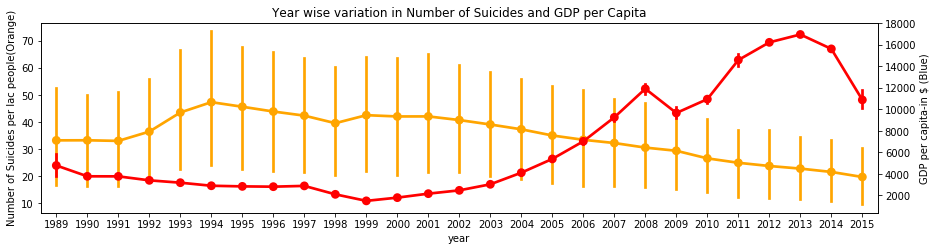

In [65]:
yearwise_variation_in('Russian Federation')

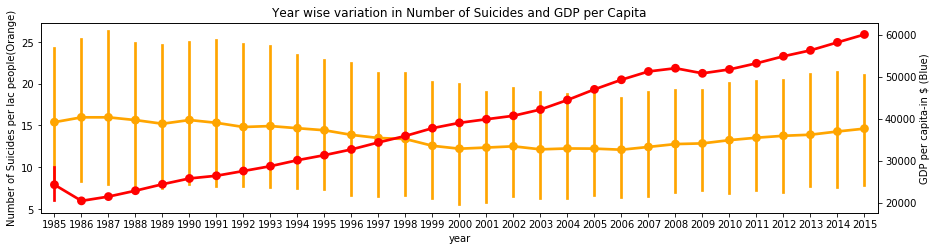

In [66]:
yearwise_variation_in('United States')

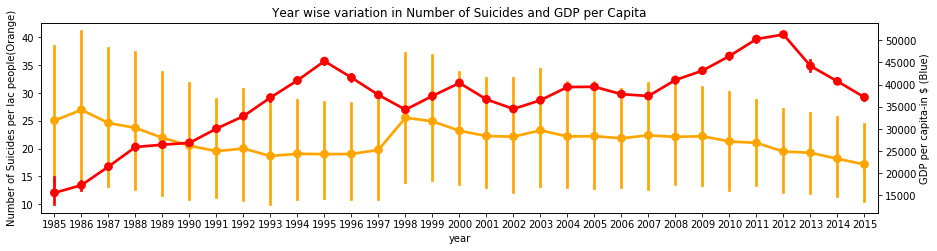

In [68]:
yearwise_variation_in('Japan')

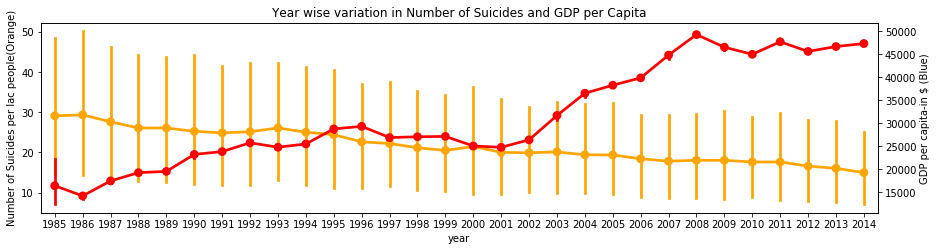

In [69]:
yearwise_variation_in('France')

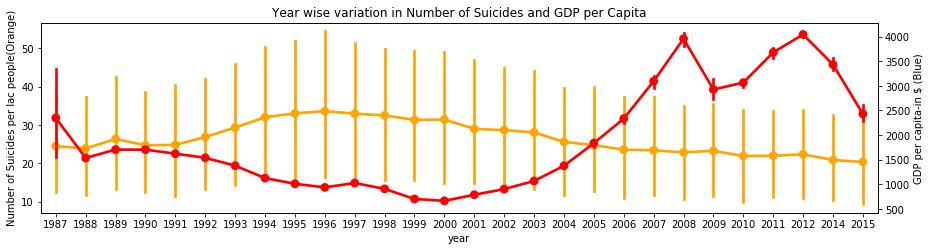

In [70]:
yearwise_variation_in('Ukraine')

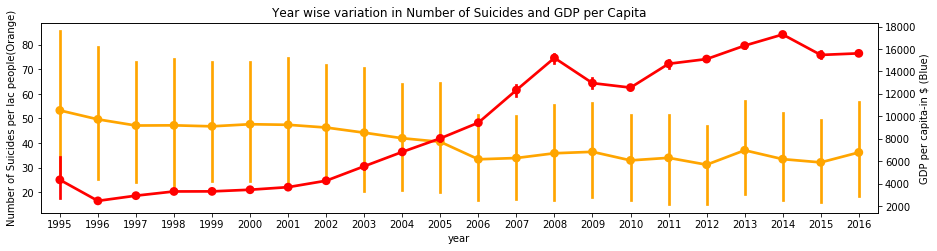

In [71]:
yearwise_variation_in('Lithuania')

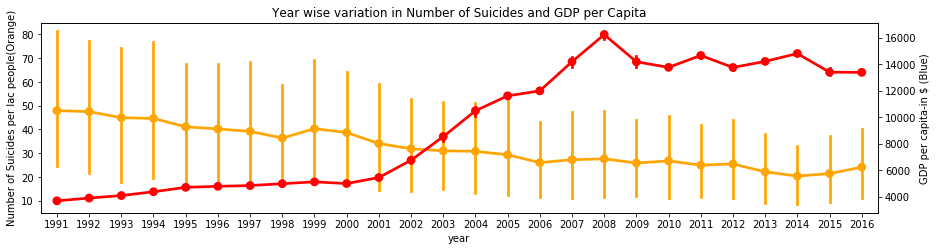

In [72]:
yearwise_variation_in('Hungary')

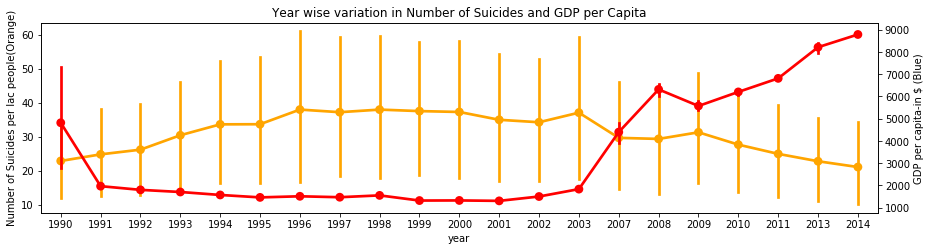

In [73]:
yearwise_variation_in('Belarus')

In [35]:
By_Year = suicide.groupby(['year'],as_index=False).agg({'suicides_no':'sum','population':'sum','suicides/100k pop':'sum'})
By_Year.tail(1)

,year,suicides_no,suicides/100k pop,population
31,2016,15144,1915.85,129222963


In [36]:
By_Year=By_Year.drop(31)
By_Year.tail(1)

,year,suicides_no,suicides/100k pop,population
30,2015,200209,7887.09,1640111082


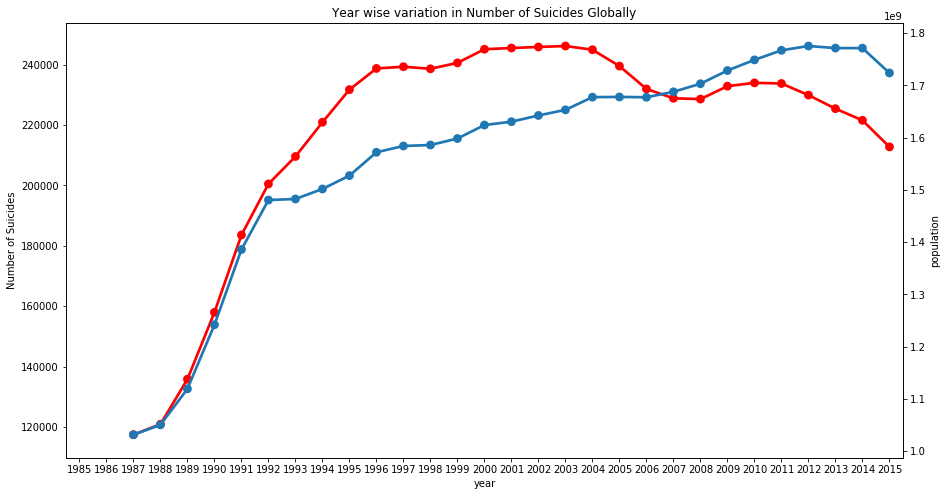

In [37]:
plt.figure(figsize=(15,8));
ax1 = sns.pointplot(x='year',y=By_Year['suicides_no'].rolling(window=3).mean(),data=By_Year, color = 'red');
ax2 = ax1.twinx()
sns.pointplot(x='year',y=By_Year['population'].rolling(window=3).mean(),data=By_Year, ax = ax2);
plt.xlabel('Year')
ax1.set_ylabel('Number of Suicides');
plt.title('Year wise variation in Number of Suicides Globally');

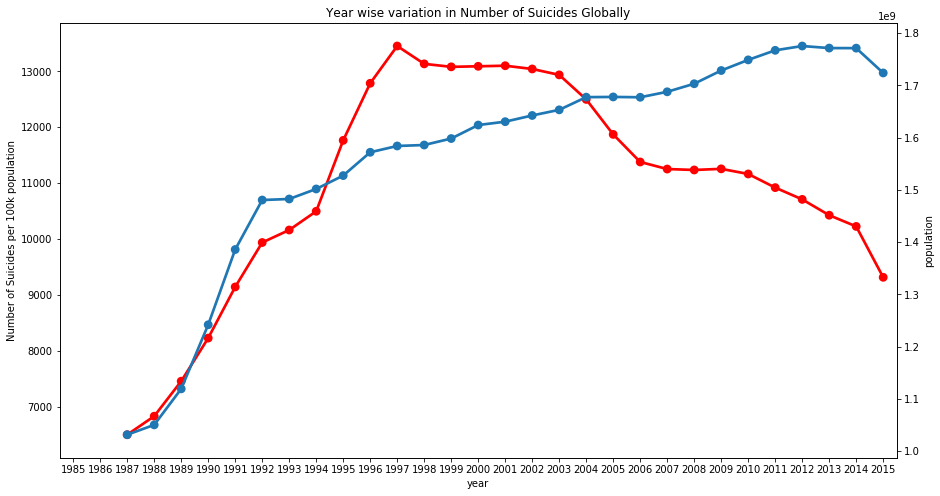

In [38]:
plt.figure(figsize=(15,8));
ax1 = sns.pointplot(x='year',y=By_Year['suicides/100k pop'].rolling(window=3).mean(),data=By_Year, color = 'red');
ax2 = ax1.twinx()
sns.pointplot(x='year',y=By_Year['population'].rolling(window=3).mean(),data=By_Year, ax = ax2);
plt.xlabel('Year')
ax1.set_ylabel('Number of Suicides per 100k population');
plt.title('Year wise variation in Number of Suicides Globally');

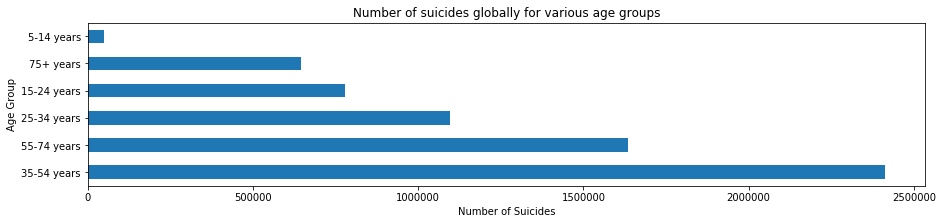

In [39]:
plt.figure(figsize=(15,3))
suicide.groupby(['age'])['suicides_no'].sum().sort_values(ascending=False).head(50).plot(kind='barh');
plt.xlabel('Number of Suicides')
plt.ylabel('Age Group')
plt.title('Number of suicides globally for various age groups');

In [40]:
By_Age = suicide.groupby(['age','year'],as_index=False).agg({'suicides_no':'sum','population':'sum','suicides/100k pop':'sum'})
By_Age = By_Age[By_Age['year'] != 2016]
By_Age.sample(3)

,age,year,suicides_no,suicides/100k pop,population
167,75+ years,1993,20494,3382.76,67786033
2,15-24 years,1987,16359,770.09,207211032
145,55-74 years,2003,59405,2796.44,289186419


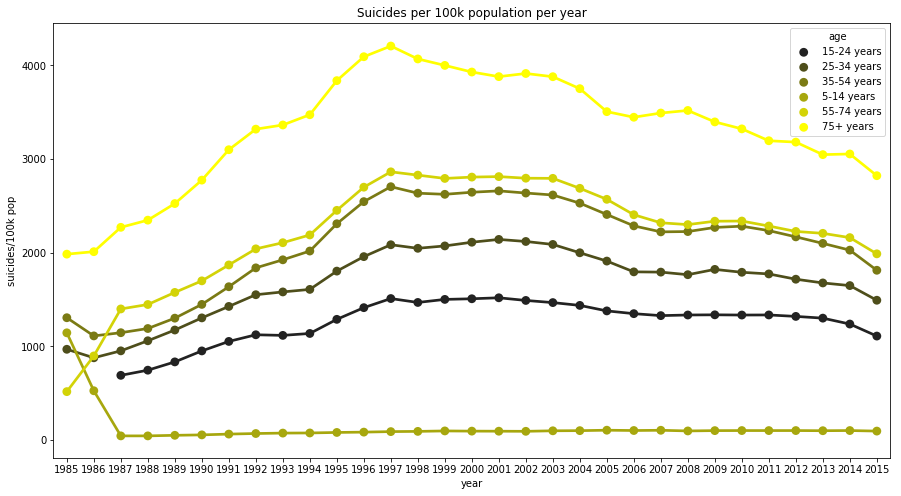

In [41]:
plt.figure(figsize=(15,8));
sns.pointplot(x='year',y=By_Age['suicides/100k pop'].rolling(window=3).mean(),data=By_Age, hue='age' ,color = 'yellow');
plt.title('Suicides per 100k population per year');

In [42]:
By_generation = suicide.groupby(['generation','year'],as_index=False).agg({'suicides_no':'sum','population':'sum','suicides/100k pop':'sum'})
By_generation = By_generation[By_generation['year'] != 2016]
By_generation.sample(3)

,generation,year,suicides_no,suicides/100k pop,population
140,Silent,2011,23735,3007.83,112176540
47,Generation X,1985,16342,703.50,387618661
73,Generation X,2011,83676,2107.62,522020585


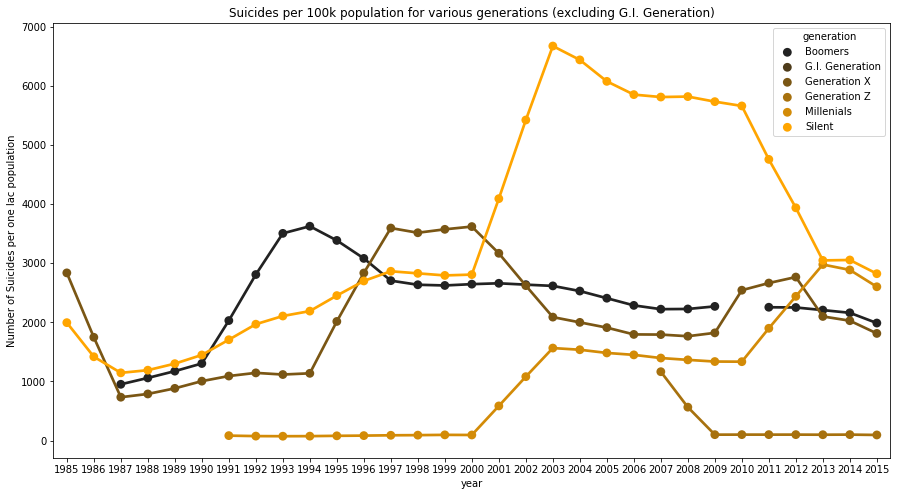

In [43]:
plt.figure(figsize=(15,8));
sns.pointplot(x='year',y=By_generation['suicides/100k pop'].rolling(window=3).mean(),data=By_generation[By_generation['generation']!='G.I. Generation'], hue='generation' ,color = 'orange');
plt.title('Suicides per 100k population for various generations (excluding G.I. Generation)');
plt.ylabel('Number of Suicides per one lac population');

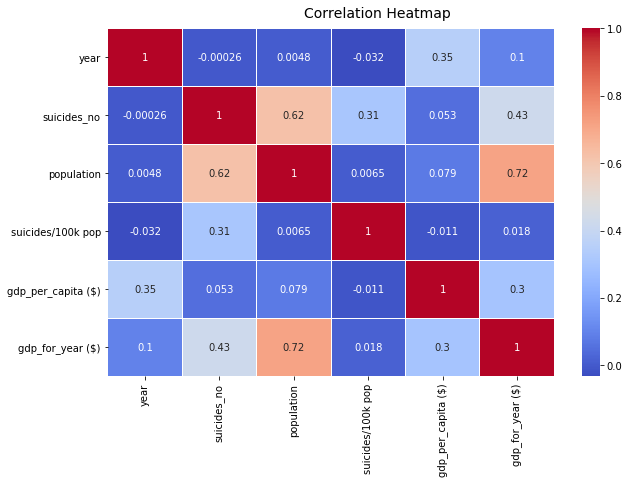

In [44]:
f, ax = plt.subplots(figsize=(10, 6))
corr = suicide.corr()
hm = sns.heatmap(corr, annot=True, ax=ax, cmap="coolwarm",linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlation Heatmap', fontsize=14)

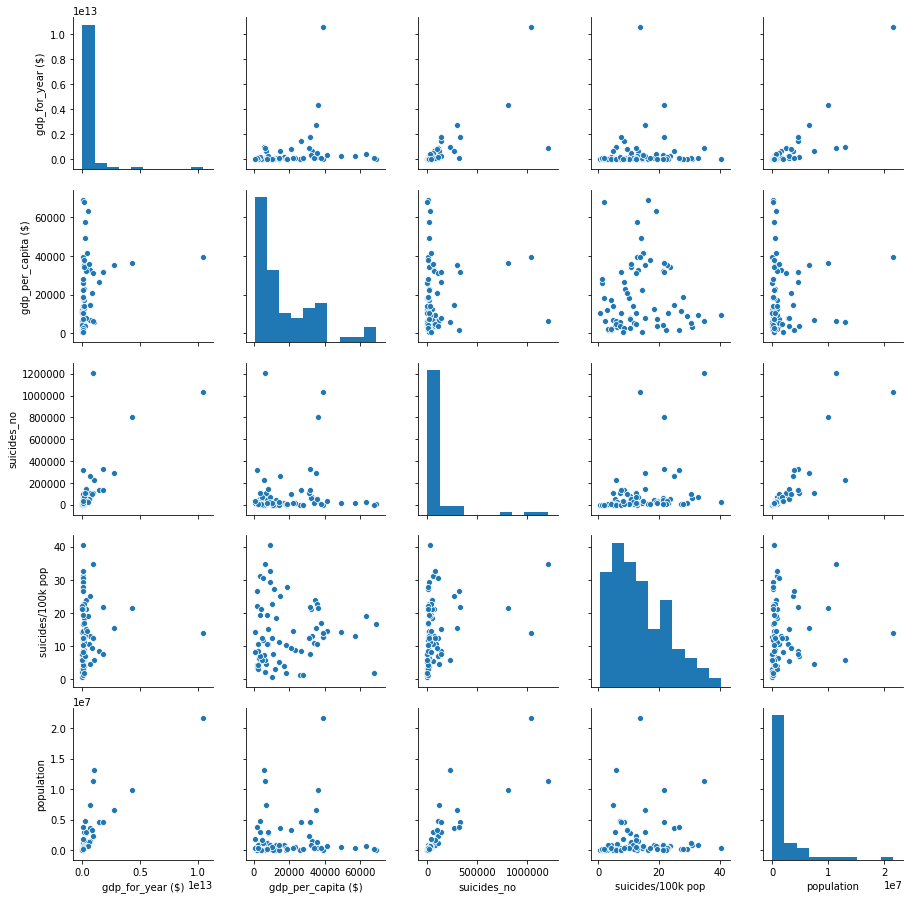

In [45]:
sns.pairplot(By_Country)